In [1]:
from orphics import maps
import numpy as np

import camb

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#(Ωb,Ωm,ΩΛ,h,ns,σ8)
#Omb, Om, OL, h, ns, sig8 = (0.044, 0.264, 0.736, 0.71, 0.96, 0.80) 

In [2]:
lmax = 7000

In [3]:
sehgalfname = 'sehgal'
webskyfname = 'websky'
fname = webskyfname

ini_filename = f'../input/{fname}.ini'
params = camb.read_ini(ini_filename)

In [47]:
#pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
#pars.set_cosmology(H0 = h*100, ombh2 = Omb*h**2, omch2 = (Om-Omb)*h**2, mnu = 0, omk = 0.0, tau =  0.087)
#pars.InitPower.set_params(As = 2.4e-9, ns = ns, r = 0)
#pars.set_for_lmax(lmax, lens_potential_accuracy = 4)

In [50]:
params.set_matter_power(redshifts = [0.], kmax = 10.0)
#Linear spectra
params.NonLinear = camb.model.NonLinear_both
results = camb.get_results(params)
s8 = np.array(results.get_sigma8())

In [51]:
s8

array([0.77683016])

In [7]:
#calculate results for these parameters
results = camb.get_results(params)

In [8]:
powers =results.get_cmb_power_spectra(params, CMB_unit = 'muK')
for name in powers: 
    print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [12]:
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']

In [9]:
ls = np.arange(powers['unlensed_scalar'].shape[0])

In [10]:
np.savetxt('../input/Sehgal_lenspotentialCls.dat', np.c_[ls, powers['unlensed_scalar'], powers['lens_potential']])

In [13]:
np.savetxt('_lensedCls.dat', np.c_[ls, totCL])

In [14]:
np.savetxt('_scalCls.dat', np.c_[ls, unlensedCL])

In [14]:
gcls = results.get_lensed_gradient_cls(lmax = 19901, CMB_unit = 'muK', raw_cl = True)

In [15]:
ll = gcls.shape[0]
factorll = ll*(ll+1)/(2*np.pi)

In [64]:
grad = np.loadtxt('/global/homes/o/omard/so-lenspipe/data/cosmo2017_10K_acc3_camb_1.0.12_grads.dat')

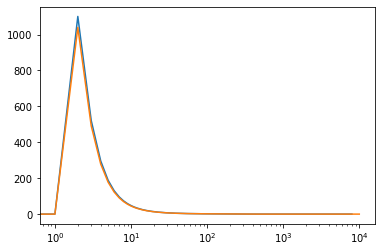

In [65]:
plt.plot(grad[:, 1])
plt.plot(gcls[:, 0])
plt.xscale('log')

In [18]:
#np.savetxt('_camb_1.0.12_grads.dat', np.c_[ls, gcls[:-1, :]])

In [19]:
lssehgal, clssehgal = np.loadtxt('/global/cscratch1/sd/omard/scatteringtfms/sims/CMB_PS_healpix_Nside4096_DeltaT_uK_SimLensCMB.txt', unpack = True)

In [20]:
factor = lssehgal*(lssehgal+1)/(2*np.pi)

In [21]:
L, TT, EE, BB, TE  = np.loadtxt('../input/lensed_sehgal_mat.dat', unpack = True)
Lfac = L*(L+1)/(2*np.pi)

(19901, 4)


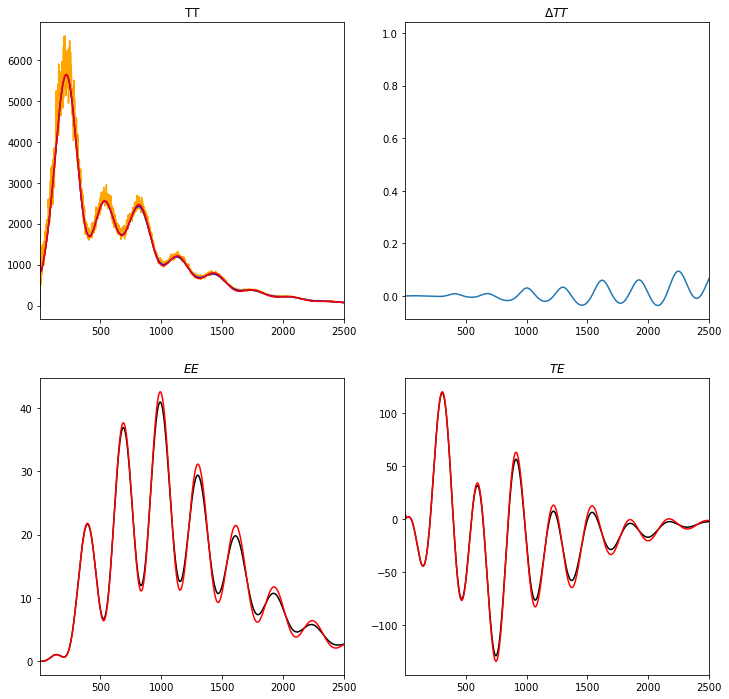

In [23]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(lssehgal, clssehgal*factor, color='orange')
ax[0,0].plot(L, TT, color='blue')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$');
for ax in ax.reshape(-1): ax.set_xlim([2,2500]);

## Checking Masked CMB map power spectrum

In [2]:
import healpy as hp

#import pymaster as nmt

alms = hp.read_alm(f'/global/cscratch1/sd/omard/scatteringtfms/sims/cmb_masked_alm.fits')
cls = hp.alm2cl(alms)


In [ ]:
mappa = hp.alm2map(alms, nside = 4096)

In [ ]:
mask = hp.read_map('/global/cscratch1/sd/omard/scatteringtfms/sims/source_mask_145GHz.fits')

In [3]:
alms = hp.read_alm(f'/global/cscratch1/sd/omard/scatteringtfms/sims/cmb_alm.fits')
clsnon = hp.alm2cl(alms)
#mappanon = hp.alm2map(alms, nside = 4096)

In [4]:
#f = nmt.NmtField(mask, [mappa])
#fnon = nmt.NmtField(mask, [mappanon])

In [5]:
#b = nmt.NmtBin.from_nside_linear(4096, 4)

In [6]:
#cl_00 = nmt.compute_full_master(f, f, b)
#ell_arr = b.get_effective_ells()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
ell_arr, cl_00 = np.loadtxt('/global/cscratch1/sd/omard/nammasked.txt', unpack = True)
f_arr = ell_arr*(ell_arr+1)/(2*np.pi)

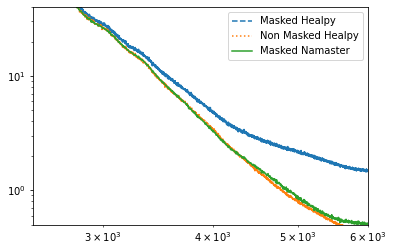

In [31]:
ll = np.arange(len(cls)) 
ff = ll*(ll+1)/(2*np.pi)
plt.plot(ll, cls*ff, ls = '--', label = 'Masked Healpy')
plt.plot(ll, clsnon*ff, ls = ':', label = 'Non Masked Healpy')
plt.plot(ell_arr, cl_00*f_arr, label = 'Masked Namaster')
#plt.plot(lssehgal, clssehgal*factor, color='orange')
plt.yscale('log')
plt.xscale('log')
plt.ylim(5e-1, 40)
plt.xlim(2500, 6000)
plt.legend()

In [ ]:
def get_theory_dicts(nells=None,lmax=9000,grad=True):
    thloc = os.path.dirname(os.path.abspath(__file__)) + "/../data/" + config['theory_root']
    ls = np.arange(lmax+1)
    ucls = {}
    tcls = {}
    theory = cosmology.loadTheorySpectraFromCAMB(thloc,get_dimensionless=False)
    ells,gt,ge,gb,gte = np.loadtxt(f"{thloc}_camb_1.0.12_grads.dat",unpack=True,usecols=[0,1,2,3,4])
    if nells is None: nells = {'TT':0,'EE':0,'BB':0}
    ucls['TT'] = maps.interp(ells,gt)(ls) if grad else theory.lCl('TT',ls)
    ucls['TE'] = maps.interp(ells,gte)(ls) if grad else theory.lCl('TE',ls)
    ucls['EE'] = maps.interp(ells,ge)(ls) if grad else theory.lCl('EE',ls)
    ucls['BB'] = maps.interp(ells,gb)(ls) if grad else theory.lCl('BB',ls)
    ucls['kk'] = theory.gCl('kk',ls)
    tcls['TT'] = theory.lCl('TT',ls) + nells['TT']
    tcls['TE'] = theory.lCl('TE',ls)
    tcls['EE'] = theory.lCl('EE',ls) + nells['EE']
    tcls['BB'] = theory.lCl('BB',ls) + nells['BB']
    return ucls, tcls

In [4]:
def websky_cosmology():
#stolen from ~https://mocks.cita.utoronto.ca/data/websky/v0.0/cosmology.py
    output = {}
    output['omega_b'] = 0.049
    output['omega_c'] = 0.261
    output['omega_m'] = output['omega_b'] + output['omega_c']
    output['h']      = 0.68
    output['n_s']     = 0.965
    # sigma8 = 0.81

    output['A_s'] = 2.022e-9 #note this gets me s8 = 0.81027349, pretty close to the specified 0.81
    #2.08-09

    return output


In [11]:
websky_params = websky_cosmology()
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(
    H0 = websky_params['h'] * 100,
    ombh2 = websky_params['omega_b'] * websky_params['h']**2,
    omch2 = websky_params['omega_c'] * websky_params['h']**2,
    mnu = 0.,
    omk = 0,
    tau = 0.055)
pars.InitPower.set_params(websky_params['A_s'],
        ns = websky_params['n_s'],
        )
#Linear spectra
pars.NonLinear = camb.model.NonLinear_both
pars.set_for_lmax(10000, lens_potential_accuracy = 3)
results = camb.get_results(pars)

In [12]:
powers = results.get_cmb_power_spectra(pars, CMB_unit = 'muK')
#for name in powers: 
#    print(name)

In [10]:
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
ls = np.arange(powers['unlensed_scalar'].shape[0])
np.savetxt(f'../input/{fname}/{fname}_lenspotentialCls.dat', np.c_[ls, powers['unlensed_scalar'], powers['lens_potential']])
np.savetxt(f'../input/{fname}/{fname}_lensedCls.dat', np.c_[ls, totCL])
np.savetxt(f'../input/{fname}/{fname}_scalCls.dat', np.c_[ls, unlensedCL])
gcls = results.get_lensed_gradient_cls(lmax = 10000, CMB_unit = 'muK', raw_cl = True)
ll = gcls.shape[0]-1
factorll = ll*(ll+1)/(2*np.pi)
np.savetxt(f'../input/{fname}/{fname}_camb_1.0.12_grads.dat', np.c_[np.arange(ll), gcls[:-1, :]])